In [1]:
"""
This script is used to analyze data and produce Figures 5C and 5D of the manuscript
'Plasmid-mediated phenotypic noise leads to transient antibiotic resistance in bacteria'.

MIT License

Copyright (c) 2023 JCRHB/RPM

""";


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
rootDir="/content/drive/MyDrive/SYNC_Projects/"

rootDir=rootDir+"pBGT/GIT/"

data_path=rootDir+"data/"
fig_path=rootDir+"figures/"


In [5]:

# DEFINE PATHS AND PARAMETERS
data_path_MGGT = data_path+'uJ_data/MGGT-Pulse/data/lineages_status/'
frames_MGGT = range(10, 35)

data_path_pBGT = data_path+'uJ_data/pBGT-Pulse/data/lineages_status/'
frames_pBGT = range(20, 45)

frames = range(1, len(frames_pBGT) + 1)
num_frames = len(frames_pBGT)
frame2min = 10

color_light_normal = '#779ECC'
color_light_elongated = '#FEFAD0'
color_light_dead = '#FF985A'  # '#F8766D'

# LOAD DATA
def load_data(data_path, frames):
    files = os.listdir(data_path)
    num_normal_reps = np.zeros((len(files), len(frames)))
    num_elongated_reps = np.zeros((len(files), len(frames)))
    num_dead_reps = np.zeros((len(files), len(frames)))

    for i, file in enumerate(files):
        file_path = os.path.join(data_path, file)
        print(f"Loading {file_path}")
        data = pd.read_csv(file_path)

        for j, frame in enumerate(frames):
            this_frame = frames[j]
            frame_data = data.loc[data['frame'] == this_frame, :]

            num_elongated_reps[i, j] = len(frame_data.loc[frame_data['state'] == 2, :])
            num_normal_reps[i, j] = len(frame_data.loc[frame_data['state'] == 1, :])
            num_dead_reps[i, j] = len(frame_data.loc[frame_data['state'] == 3, :])

    num_normal = num_normal_reps.sum(axis=0)
    num_elongated = num_elongated_reps.sum(axis=0)
    num_dead = num_dead_reps.sum(axis=0)

    return num_normal, num_elongated, num_dead

num_normal_MGGT, num_elongated_MGGT, num_dead_MGGT = load_data(data_path_MGGT, frames_MGGT)
num_normal_pBGT, num_elongated_pBGT, num_dead_pBGT = load_data(data_path_pBGT, frames_pBGT)


Loading /content/drive/MyDrive/SYNC_Projects/pBGT/GIT/data/uJ_data/MGGT-Pulse/data/lineages_status/MGGT-AMP-Pulse_xy01_lineages_status.csv
Loading /content/drive/MyDrive/SYNC_Projects/pBGT/GIT/data/uJ_data/MGGT-Pulse/data/lineages_status/MGGT-AMP-Pulse_xy05_lineages_status.csv
Loading /content/drive/MyDrive/SYNC_Projects/pBGT/GIT/data/uJ_data/MGGT-Pulse/data/lineages_status/MGGT-AMP-Pulse_xy06_lineages_status.csv
Loading /content/drive/MyDrive/SYNC_Projects/pBGT/GIT/data/uJ_data/MGGT-Pulse/data/lineages_status/MGGT-AMP-Pulse_xy13_lineages_status.csv
Loading /content/drive/MyDrive/SYNC_Projects/pBGT/GIT/data/uJ_data/MGGT-Pulse/data/lineages_status/MGGT-AMP-Pulse_xy12_lineages_status.csv
Loading /content/drive/MyDrive/SYNC_Projects/pBGT/GIT/data/uJ_data/MGGT-Pulse/data/lineages_status/MGGT-AMP-Pulse_xy09_lineages_status.csv
Loading /content/drive/MyDrive/SYNC_Projects/pBGT/GIT/data/uJ_data/MGGT-Pulse/data/lineages_status/MGGT-AMP-Pulse_xy04_lineages_status.csv
Loading /content/drive/MyDr

## Figure 5C

/content/drive/MyDrive/SYNC_Projects/pBGT/GIT/figures/Fig-5C.pdf


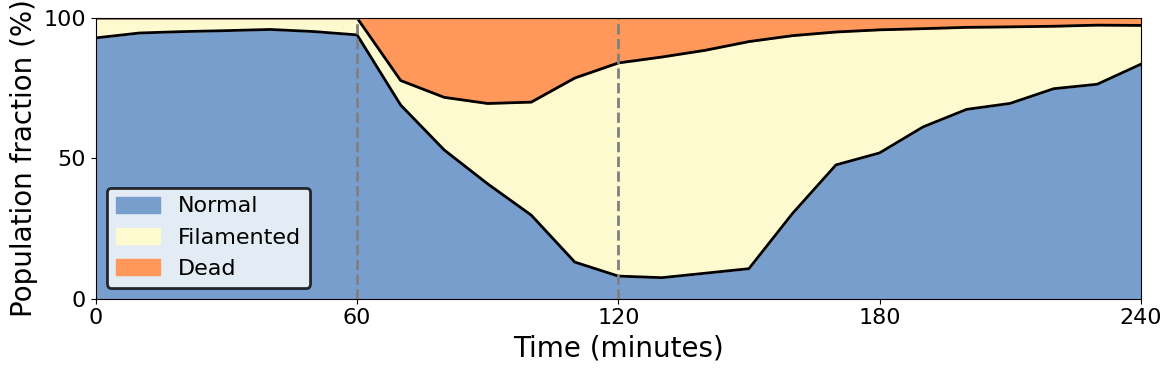

In [6]:
times = np.array(frames) * frame2min -10

# PLOT POPULATION FRACTIONS FOR MGGT
num_total_MGGT = num_normal_MGGT + num_elongated_MGGT + num_dead_MGGT
normal_upper = 100 * num_normal_MGGT / num_total_MGGT
normal_lower = np.zeros(num_frames)
elongated_upper = 100 * (num_normal_MGGT + num_elongated_MGGT) / num_total_MGGT
elongated_lower = 100 * num_normal_MGGT / num_total_MGGT
dead_upper = 100 * (num_normal_MGGT + num_elongated_MGGT + num_dead_MGGT) / num_total_MGGT
dead_lower = 100 * (num_normal_MGGT + num_elongated_MGGT) / num_total_MGGT

# Create the figure and plot the data
fig, ax = plt.subplots(figsize=(12, 4))
plt.rcParams.update({'font.size': 16})
fig.set_facecolor('white')

ax.fill_between(times, normal_lower, normal_upper, color=color_light_normal,label="Normal")
ax.fill_between(times, elongated_lower, elongated_upper, color=color_light_elongated,label="Filamented")
ax.fill_between(times, dead_lower, dead_upper, color=color_light_dead,label="Dead")
ax.plot(times, normal_upper, '-k', linewidth=2)
ax.plot(times, elongated_upper, '-k', linewidth=2)

# Add the vertical lines
ax.axvline(x=60, linestyle='--', color='gray', linewidth=2)
ax.axvline(x=120, linestyle='--', color='gray', linewidth=2)

# Set the axis labels and limits
ax.set_xlabel('Time (minutes)', fontsize=20)
ax.set_ylabel('Population fraction (%)', fontsize=20)
ax.set_xlim(0, 240)
ax.set_ylim(0, 100)
ax.set_xticks(np.arange(0, 241, 60))
ax.set_yticks(np.arange(0, 101, 50))
ax.tick_params(labelsize=16)

leg=ax.legend(frameon=True,facecolor='w')
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(2.0)

# Save the figure
plt.tight_layout()
figname=fig_path+"Fig-5C.pdf"
print(figname)
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()


## Figure 5D

/content/drive/MyDrive/SYNC_Projects/pBGT/GIT/figures/Fig-5D.pdf


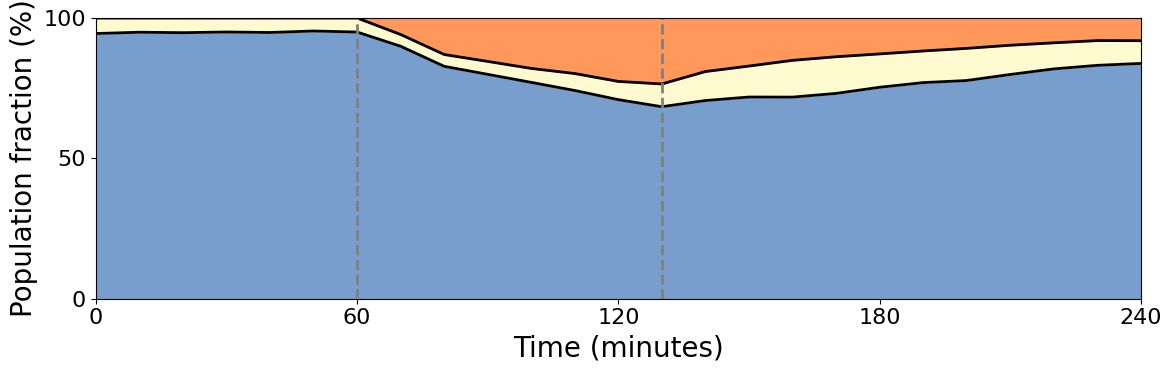

In [7]:
times = np.array(frames) * frame2min-10

# PLOT POPULATION FRACTIONS FOR pBGT
num_total_pBGT = num_normal_pBGT + num_elongated_pBGT + num_dead_pBGT
normal_upper = 100 * num_normal_pBGT / num_total_pBGT
normal_lower = np.zeros(num_frames)
elongated_upper = 100 * (num_normal_pBGT + num_elongated_pBGT) / num_total_pBGT
elongated_lower = 100 * num_normal_pBGT / num_total_pBGT
dead_upper = 100 * (num_normal_pBGT + num_elongated_pBGT + num_dead_pBGT) / num_total_pBGT
dead_lower = 100 * (num_normal_pBGT + num_elongated_pBGT) / num_total_pBGT

# Create the figure and plot the data
fig, ax = plt.subplots(figsize=(12, 4))
plt.rcParams.update({'font.size': 16})
fig.set_facecolor('white')


ax.fill_between(times, normal_lower, normal_upper, color=color_light_normal)
ax.fill_between(times, elongated_lower, elongated_upper, color=color_light_elongated)
ax.fill_between(times, dead_lower, dead_upper, color=color_light_dead)
ax.plot(times, normal_upper, '-k', linewidth=2)
ax.plot(times, elongated_upper, '-k', linewidth=2)

# Add the vertical lines
ax.axvline(x=60, linestyle='--', color='gray', linewidth=2)
ax.axvline(x=130, linestyle='--', color='gray', linewidth=2)

# Set the axis labels and limits
ax.set_xlabel('Time (minutes)', fontsize=20)
ax.set_ylabel('Population fraction (%)', fontsize=20)
ax.set_xlim(10, 240)
ax.set_ylim(0, 100)
ax.set_xticks(np.arange(0, 241, 60))
ax.set_yticks(np.arange(0, 101, 50))
ax.tick_params(labelsize=16)

# Save the figure
plt.tight_layout()
figname=fig_path+"Fig-5D.pdf"
print(figname)
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()

/content/drive/MyDrive/SYNC_Projects/pBGT/GIT/figures/Fig-5CD.pdf


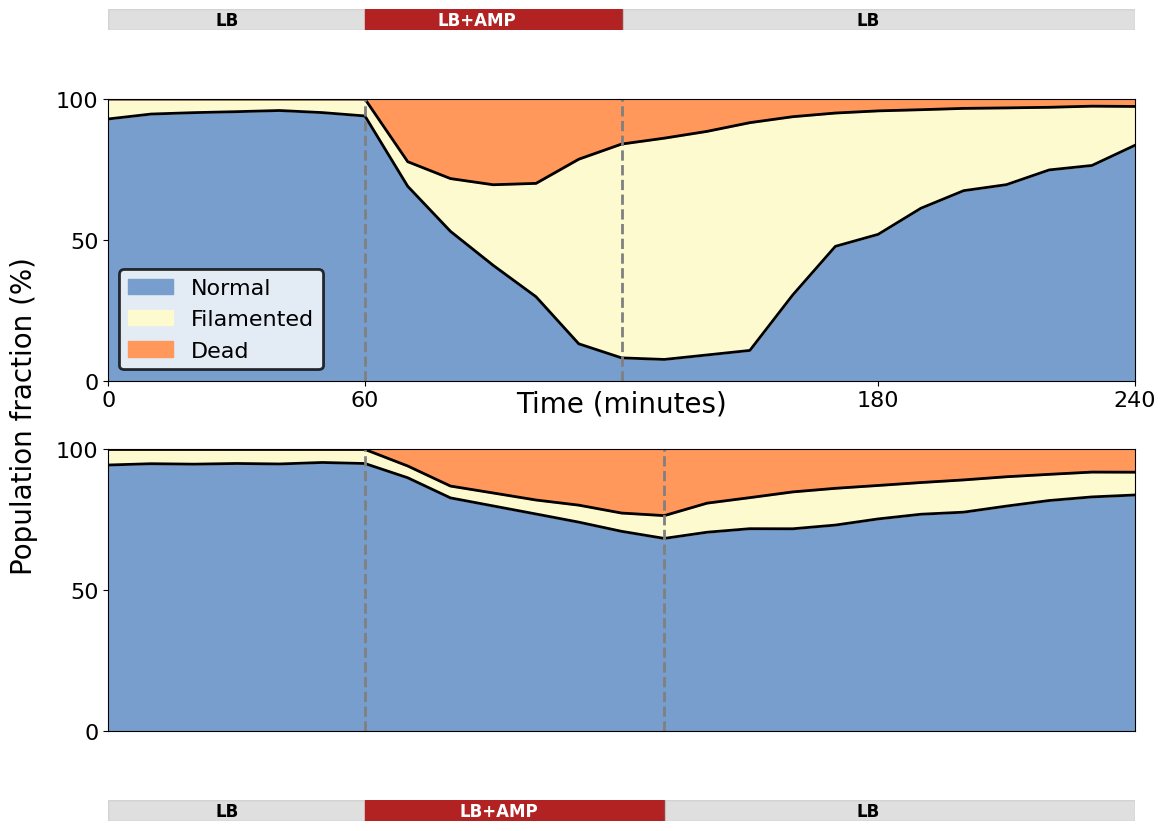

In [8]:
fig,axs=plt.subplots(4,1,figsize=(12, 8.6),gridspec_kw={'height_ratios': [0.3, 4,4,0.3]})
#fig = plt.figure(figsize=(8,8)) # Notice the equal aspect ratio
#axs = [fig.add_subplot(4,1,i+1) for i in range(4)]

plt.rcParams.update({'font.size': 16})
fig.set_facecolor('white')
plt.subplots_adjust(hspace=0.275)

ax=axs[0]
ax.set_xlim([0,240])
ax.axvspan(xmin=0,xmax=60,ymin=0,ymax=1,color='gray',alpha=0.25)
ax.axvspan(xmin=60,xmax=120,ymin=0,ymax=1,color='firebrick',alpha=1)
ax.axvspan(xmin=120,xmax=240,ymin=0,ymax=1,color='gray',alpha=0.25)

ax.annotate("LB", (25,0.225),fontsize=12,fontweight="bold")
ax.annotate("LB", (175,0.225),fontsize=12,fontweight="bold")
ax.annotate("LB+AMP", (77,0.225),fontsize=12,fontweight="bold",color="w")


ax.set_xticklabels([])
ax.set_yticklabels([])
ax.axis('off')

ax=axs[1]
num_total_MGGT = num_normal_MGGT + num_elongated_MGGT + num_dead_MGGT
normal_upper = 100 * num_normal_MGGT / num_total_MGGT
normal_lower = np.zeros(num_frames)
elongated_upper = 100 * (num_normal_MGGT + num_elongated_MGGT) / num_total_MGGT
elongated_lower = 100 * num_normal_MGGT / num_total_MGGT
dead_upper = 100 * (num_normal_MGGT + num_elongated_MGGT + num_dead_MGGT) / num_total_MGGT
dead_lower = 100 * (num_normal_MGGT + num_elongated_MGGT) / num_total_MGGT


ax.fill_between(times, normal_lower, normal_upper, color=color_light_normal,label="Normal")
ax.fill_between(times, elongated_lower, elongated_upper, color=color_light_elongated,label="Filamented")
ax.fill_between(times, dead_lower, dead_upper, color=color_light_dead,label="Dead")
ax.plot(times, normal_upper, '-k', linewidth=2)
ax.plot(times, elongated_upper, '-k', linewidth=2)

# Add the vertical lines
ax.axvline(x=60, linestyle='--', color='gray', linewidth=2)
ax.axvline(x=120, linestyle='--', color='gray', linewidth=2)

# Set the axis labels and limits
ax.set_xlabel('Time (minutes)', fontsize=20,labelpad=-15)
#ax.set_ylabel('Population fraction (%)', fontsize=20)
ax.set_xlim(0, 240)
ax.set_ylim(0, 100)
#ax.set_xticks(np.arange(0, 241, 60))
ax.set_xticks([0,60,180,240])
ax.set_yticks(np.arange(0, 101, 50))
ax.tick_params(labelsize=16)

leg=ax.legend(frameon=True,facecolor='w')
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(2.0)

#####################################################################################
ax=axs[2]
# PLOT POPULATION FRACTIONS FOR pBGT
num_total_pBGT = num_normal_pBGT + num_elongated_pBGT + num_dead_pBGT
normal_upper = 100 * num_normal_pBGT / num_total_pBGT
normal_lower = np.zeros(num_frames)
elongated_upper = 100 * (num_normal_pBGT + num_elongated_pBGT) / num_total_pBGT
elongated_lower = 100 * num_normal_pBGT / num_total_pBGT
dead_upper = 100 * (num_normal_pBGT + num_elongated_pBGT + num_dead_pBGT) / num_total_pBGT
dead_lower = 100 * (num_normal_pBGT + num_elongated_pBGT) / num_total_pBGT

# Create the figure and plot the data


ax.fill_between(times, normal_lower, normal_upper, color=color_light_normal)
ax.fill_between(times, elongated_lower, elongated_upper, color=color_light_elongated)
ax.fill_between(times, dead_lower, dead_upper, color=color_light_dead)
ax.plot(times, normal_upper, '-k', linewidth=2)
ax.plot(times, elongated_upper, '-k', linewidth=2)

# Add the vertical lines
ax.axvline(x=60, linestyle='--', color='gray', linewidth=2)
ax.axvline(x=130, linestyle='--', color='gray', linewidth=2)

# Set the axis labels and limits
#ax.set_xlabel('Time (minutes)', fontsize=20)
#ax.set_ylabel('Population fraction (%)', fontsize=20)
ax.set_xlim(0, 240)
ax.set_ylim(0, 100)
ax.set_xticks([])
ax.set_yticks(np.arange(0, 101, 50))
ax.tick_params(labelsize=16)

###################################################
ax=axs[3]
ax.set_xlim([0,240])
ax.axvspan(xmin=0,xmax=60,ymin=0,ymax=1,color='gray',alpha=0.25)
ax.axvspan(xmin=60,xmax=130,ymin=0,ymax=1,color='firebrick',alpha=1)
ax.axvspan(xmin=130,xmax=240,ymin=0,ymax=1,color='gray',alpha=0.25)

ax.annotate("LB", (25,0.225),fontsize=12,fontweight="bold")
ax.annotate("LB", (175,0.225),fontsize=12,fontweight="bold")
ax.annotate("LB+AMP", (82,0.225),fontsize=12,fontweight="bold",color="w")

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.axis('off')
#####################


fig.supylabel("Population fraction (%)", fontsize=20,x=0.025,y=0.5)


plt.tight_layout()
figname=fig_path+"Fig-5CD.pdf"
print(figname)
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)



plt.show()